In [52]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
# import pydotplus
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import mixture



In [53]:
balance_data = pd.read_csv("https://raw.githubusercontent.com/rohitgupta29/Jai_Kisan/master/Data/test_dec")




In [76]:
df_x = df[['REGION', 'SOWING_TIME', 'Average Soil_pH','SOIL_TYPE']]
df_x.head()

df_y = df[["CROP"]]
df_y

,CROP
0,1
1,1
2,1
3,1
4,1
...,...
12823,47
12824,47
12825,47
12826,47


In [55]:
df=balance_data[['CROP', 'REGION', 'SOWING_TIME', 'Average Soil_pH','SOIL_TYPE']].copy()
print(df.head(20))
df.shape

     CROP          REGION SOWING_TIME  Average Soil_pH           SOIL_TYPE
0   Bajra  Andhra Pradesh        June              6.5  black cotton soil 
1   Bajra  Andhra Pradesh        June              6.5  black cotton soil 
2   Bajra  Andhra Pradesh        July              6.5  black cotton soil 
3   Bajra  Andhra Pradesh     January              6.5  black cotton soil 
4   Bajra  Andhra Pradesh    February              6.5  black cotton soil 
5   Bajra  Andhra Pradesh       March              6.5  black cotton soil 
6   Bajra  Andhra Pradesh        June              6.5  black cotton soil 
7   Bajra  Andhra Pradesh        June              6.5  black cotton soil 
8   Bajra  Andhra Pradesh        July              6.5  black cotton soil 
9   Bajra  Andhra Pradesh     January              6.5  black cotton soil 
10  Bajra  Andhra Pradesh    February              6.5  black cotton soil 
11  Bajra  Andhra Pradesh       March              6.5  black cotton soil 
12  Bajra         Gujarat

(12828, 5)

In [56]:
df['CROP']=df['CROP'].str.lower()
df['REGION']=df['REGION'].str.lower()
df['SOWING_TIME']=df['SOWING_TIME'].str.lower()

df['SOIL_TYPE']=df['SOIL_TYPE'].str.lower()

In [57]:
df.head()


,CROP,REGION,SOWING_TIME,Average Soil_pH,SOIL_TYPE
0,bajra,andhra pradesh,june,6.5,black cotton soil
1,bajra,andhra pradesh,june,6.5,black cotton soil
2,bajra,andhra pradesh,july,6.5,black cotton soil
3,bajra,andhra pradesh,january,6.5,black cotton soil
4,bajra,andhra pradesh,february,6.5,black cotton soil


In [58]:
df.isnull().sum()

CROP                 0
REGION               0
SOWING_TIME        392
Average Soil_pH      0
SOIL_TYPE            0
dtype: int64

In [59]:

import pandas as pd

df_updated = df.replace(to_replace ='rice ', value = 'rice', regex = True)





save_crop=df_updated["CROP"].unique()
crop_dict={}
count=1
for i in save_crop:
  crop_dict[i]=count
  count=count+1

print(crop_dict)



{'bajra': 1, 'jowar': 2, 'lentil': 3, 'horse gram': 4, 'wheat': 5, 'rice': 6, 'red gram': 7, 'ragi': 8, 'oat': 9, 'mungbean': 10, 'maize': 11, 'kidney beans': 12, 'black eyed beans': 13, 'black gram': 14, 'barley': 15, 'cotton': 16, 'jute': 17, 'ricinus (castor)': 18, 'sugarcane': 19, 'lily': 20, 'lotus': 21, 'jasmine': 22, 'petunia': 23, 'rose': 24, 'safflower': 25, 'sunflower': 26, 'zennia': 27, 'peach': 28, 'apple': 29, 'apricot': 30, 'avocado': 31, 'banana': 32, 'barbados cherry': 33, 'cashew trees': 34, 'cherry': 35, 'chikoo': 36, 'cucumber': 37, 'custard apple': 38, 'date palm': 39, 'dragon fruit': 40, 'fig': 41, 'grapes': 42, 'guava': 43, 'jackfruit': 44, 'kiwi': 45, 'lemon': 46}


In [60]:
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='february', value = 'feb',regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='june ', value = 'june', regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='april ', value = 'april', regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='december ', value = 'december', regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='october ', value = 'october', regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='april  ', value = 'april', regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='july ', value = 'july', regex = True)  
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='october  ', value = 'october', regex = True)
df["SOWING_TIME"] = df["SOWING_TIME"].replace(to_replace ='feb', value = 'february',regex = True)

save_sowing=df["SOWING_TIME"].unique()
sowing_dict={}
count=1
for i in save_sowing:
  sowing_dict[i]=count
  count=count+1

print(sowing_dict)

{'june': 1, 'july': 2, 'january': 3, 'february': 4, 'march': 5, 'august': 6, 'september': 7, 'october': 8, 'november': 9, 'december': 10, 'may': 11, 'april': 12, 'october ': 13, 'april ': 14, 'whole year': 15, 'year long': 16, nan: 17, 'rainy season': 18}


In [61]:
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree



In [62]:







#CROP 

save_crop=df["CROP"].unique()
crop_dict={}
count=1
for i in save_crop:
  crop_dict[i]=count
  count=count+1

print(crop_dict)



#REGION 
save_region=df["REGION"].unique()
region_dict={}
count=1
for i in save_region:
  region_dict[i]=count
  count=count+1

print(region_dict)

#SOWING TIME 

save_sowing=df["SOWING_TIME"].unique()
sowing_dict={}
count=1
for i in save_sowing:
  sowing_dict[i]=count
  count=count+1

print(sowing_dict)

#ph
save_soilph=df["Average Soil_pH"].unique()
soilph_dict={}
count=1
for i in save_soilph:
  soilph_dict[i]=count
  count=count+1


#SOIL TYPE

save_soil=df["SOIL_TYPE"].unique()
soil_dict={}
count=1
for i in save_soil:
  soil_dict[i]=count
  count=count+1

print(soil_dict)


{'bajra': 1, 'jowar': 2, 'lentil': 3, 'horse gram': 4, 'wheat': 5, 'rice': 6, 'rice ': 7, 'red gram': 8, 'ragi': 9, 'oat': 10, 'mungbean': 11, 'maize': 12, 'kidney beans': 13, 'black eyed beans': 14, 'black gram': 15, 'barley': 16, 'cotton': 17, 'jute': 18, 'ricinus (castor)': 19, 'sugarcane': 20, 'lily': 21, 'lotus': 22, 'jasmine': 23, 'petunia': 24, 'rose': 25, 'safflower': 26, 'sunflower': 27, 'zennia': 28, 'peach': 29, 'apple': 30, 'apricot': 31, 'avocado': 32, 'banana': 33, 'barbados cherry': 34, 'cashew trees': 35, 'cherry': 36, 'chikoo': 37, 'cucumber': 38, 'custard apple': 39, 'date palm': 40, 'dragon fruit': 41, 'fig': 42, 'grapes': 43, 'guava': 44, 'jackfruit': 45, 'kiwi': 46, 'lemon': 47}
{'andhra pradesh': 1, 'gujarat': 2, 'haryana  ': 3, 'karnataka': 4, 'madhya pradesh  ': 5, 'maharashtra': 6, 'orissa ': 7, 'rajasthan ': 8, 'uttar pradesh ': 9, 'tamil nadu': 10, 'punjab': 11, 'delhi': 12, 'andra pradesh': 13, 'bihar': 14, 'haryana': 15, 'madhya pradesh': 16, 'rajasthan': 1

In [63]:
#REPLACING THE VALUES GOT IN THE DICTIONARY & REAL VALUES 
c=0

#crop ka 
for i in crop_dict:
  df=df.replace(to_replace=i,value=crop_dict[i])
  
#region ka 
for i in region_dict:
  df=df.replace(to_replace=i,value=region_dict[i])

#sowing ka 

for i in sowing_dict:
  df=df.replace(to_replace=i,value=sowing_dict[i])

#soil type ka 
for i in soil_dict:
  df=df.replace(to_replace=i,value=soil_dict[i])

print(df)


       CROP  REGION  SOWING_TIME  Average Soil_pH  SOIL_TYPE
0         1       1            1              6.5          1
1         1       1            1              6.5          1
2         1       1            2              6.5          1
3         1       1            3              6.5          1
4         1       1            4              6.5          1
...     ...     ...          ...              ...        ...
12823    47      77            4              6.0         54
12824    47      20            5              6.0         45
12825    47      20            5              6.0         54
12826    47      20            4              6.0         45
12827    47      20            4              6.0         54

[12828 rows x 5 columns]


In [64]:
def splitdataset(balance_data): 
  
    # Separating the target variable 
    X = balance_data.values[:, 1:5] 
    Y = balance_data.values[:, 0] 
  
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.2, random_state = 100) 
    
    return X, Y, X_train, X_test, y_train, y_test

In [65]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(df) 

## Random Forest 

In [87]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction_RF = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
score_rf = round(random_forest.score(X_train, y_train) * 100, 2)
print(score_rf)

99.93


In [102]:
from sklearn.model_selection import cross_val_score,KFold
kfold=KFold(n_splits=10)
score_5=cross_val_score(random_forest,X,Y,scoring ='accuracy',cv=kfold)
print(score_5)

[0.93530787 1.         1.         0.64614186 0.06780982 0.11379579
 0.09119252 0.23772408 1.         0.11544462]


## Logistic Regression

In [88]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred_LR = logreg.predict(X_test)

score_log = round(logreg.score(X_train, y_train) * 100, 2)
print(score_log)

65.9


## KNN

In [89]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train) 
Y_pred_KNN = knn.predict(X_test)
score_knn = round(knn.score(X_train, y_train) * 100, 2)
print(score_knn)

99.15


In [90]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train) 
Y_pred_GNB = gaussian.predict(X_test)
score_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(score_gaussian)

99.88


## Linear SVC

In [91]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred_SVC = linear_svc.predict(X_test)

score_lsvc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(score_lsvc)

52.17


In [92]:
df.columns[1:5]

Index(['REGION', 'SOWING_TIME', 'Average Soil_pH', 'SOIL_TYPE'], dtype='object')

## Decision Tree

In [93]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_DT = decision_tree.predict(X_test)
score_dt = round(decision_tree.score(X_train, y_train) * 100, 2)
print(score_dt)

99.93


[0.93530787 1.         1.         0.64614186 0.06780982 0.11379579
 0.14731099 0.23772408 1.         0.11544462]
0.39479391490546606
[0.93530787 1.         1.         0.64614186 0.07560405 0.11379579
 0.37646142 0.23772408 1.         0.11544462]
KNeighborsClassifier: 6.181789834736513
[0.93530787 1.         1.         0.56196415 0.00935308 0.
 0.19095869 0.04442712 0.09048362 0.11544462]


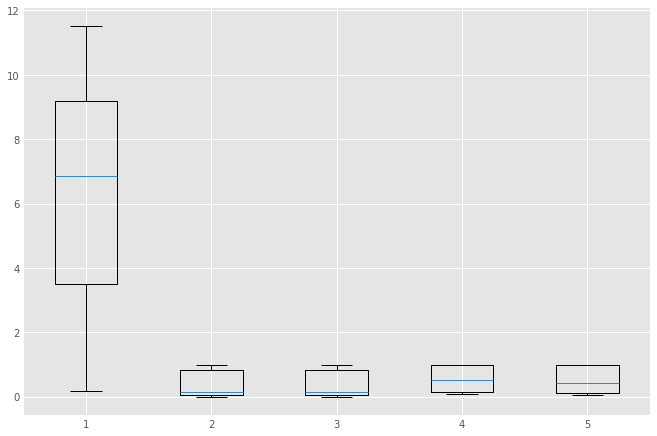

In [107]:
from sklearn.model_selection import cross_val_score,KFold
kfold=KFold(n_splits=10)
score_5=cross_val_score(random_forest,X,Y,scoring ='accuracy',cv=kfold)
print(score_5)

#log_reg
kfold = KFold(n_splits = 10)
score_2 = cross_val_score(logreg,X,Y,scoring ='accuracy',cv = kfold) #
print(score_2.mean())

#decision_tree


kfold=KFold(n_splits=10)
tree1=DecisionTreeClassifier()
score_4=cross_val_score(tree1,X,Y,scoring ='accuracy',cv=kfold)
print(score_4)
#Knn
kfold = KFold(n_splits=3, random_state=None)
model=KNeighborsClassifier(3)
score_1 = cross_val_score(model, X, Y,scoring ='accuracy', cv=kfold)
score_1 *= 100.0
print('KNeighborsClassifier:',score_1.mean())
#NB

gnb = GaussianNB()

kfold = KFold(n_splits = 10)
score_3 = cross_val_score(logreg,X,Y,scoring ='accuracy',cv = kfold) #
print(score_3)
#Linear SVC



ig = plt.figure(figsize =(10, 7)) 
plt.boxplot([score_1,score_2,score_3,score_4,score_5])
plt.show()

In [94]:
text_representation = tree.export_text(decision_tree)
print(text_representation)

|--- feature_3 <= 2.50
|   |--- feature_2 <= 6.88
|   |   |--- feature_2 <= 6.62
|   |   |   |--- class: 1.0
|   |   |--- feature_2 >  6.62
|   |   |   |--- class: 2.0
|   |--- feature_2 >  6.88
|   |   |--- class: 43.0
|--- feature_3 >  2.50
|   |--- feature_3 <= 50.50
|   |   |--- feature_3 <= 4.50
|   |   |   |--- class: 3.0
|   |   |--- feature_3 >  4.50
|   |   |   |--- feature_2 <= 7.12
|   |   |   |   |--- feature_2 <= 6.88
|   |   |   |   |   |--- feature_3 <= 44.00
|   |   |   |   |   |   |--- feature_2 <= 5.67
|   |   |   |   |   |   |   |--- feature_3 <= 21.00
|   |   |   |   |   |   |   |   |--- class: 13.0
|   |   |   |   |   |   |   |--- feature_3 >  21.00
|   |   |   |   |   |   |   |   |--- class: 18.0
|   |   |   |   |   |   |--- feature_2 >  5.67
|   |   |   |   |   |   |   |--- feature_3 <= 13.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 6.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 6.25
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 1

IndexError: index 1 is out of bounds for axis 0 with size 1

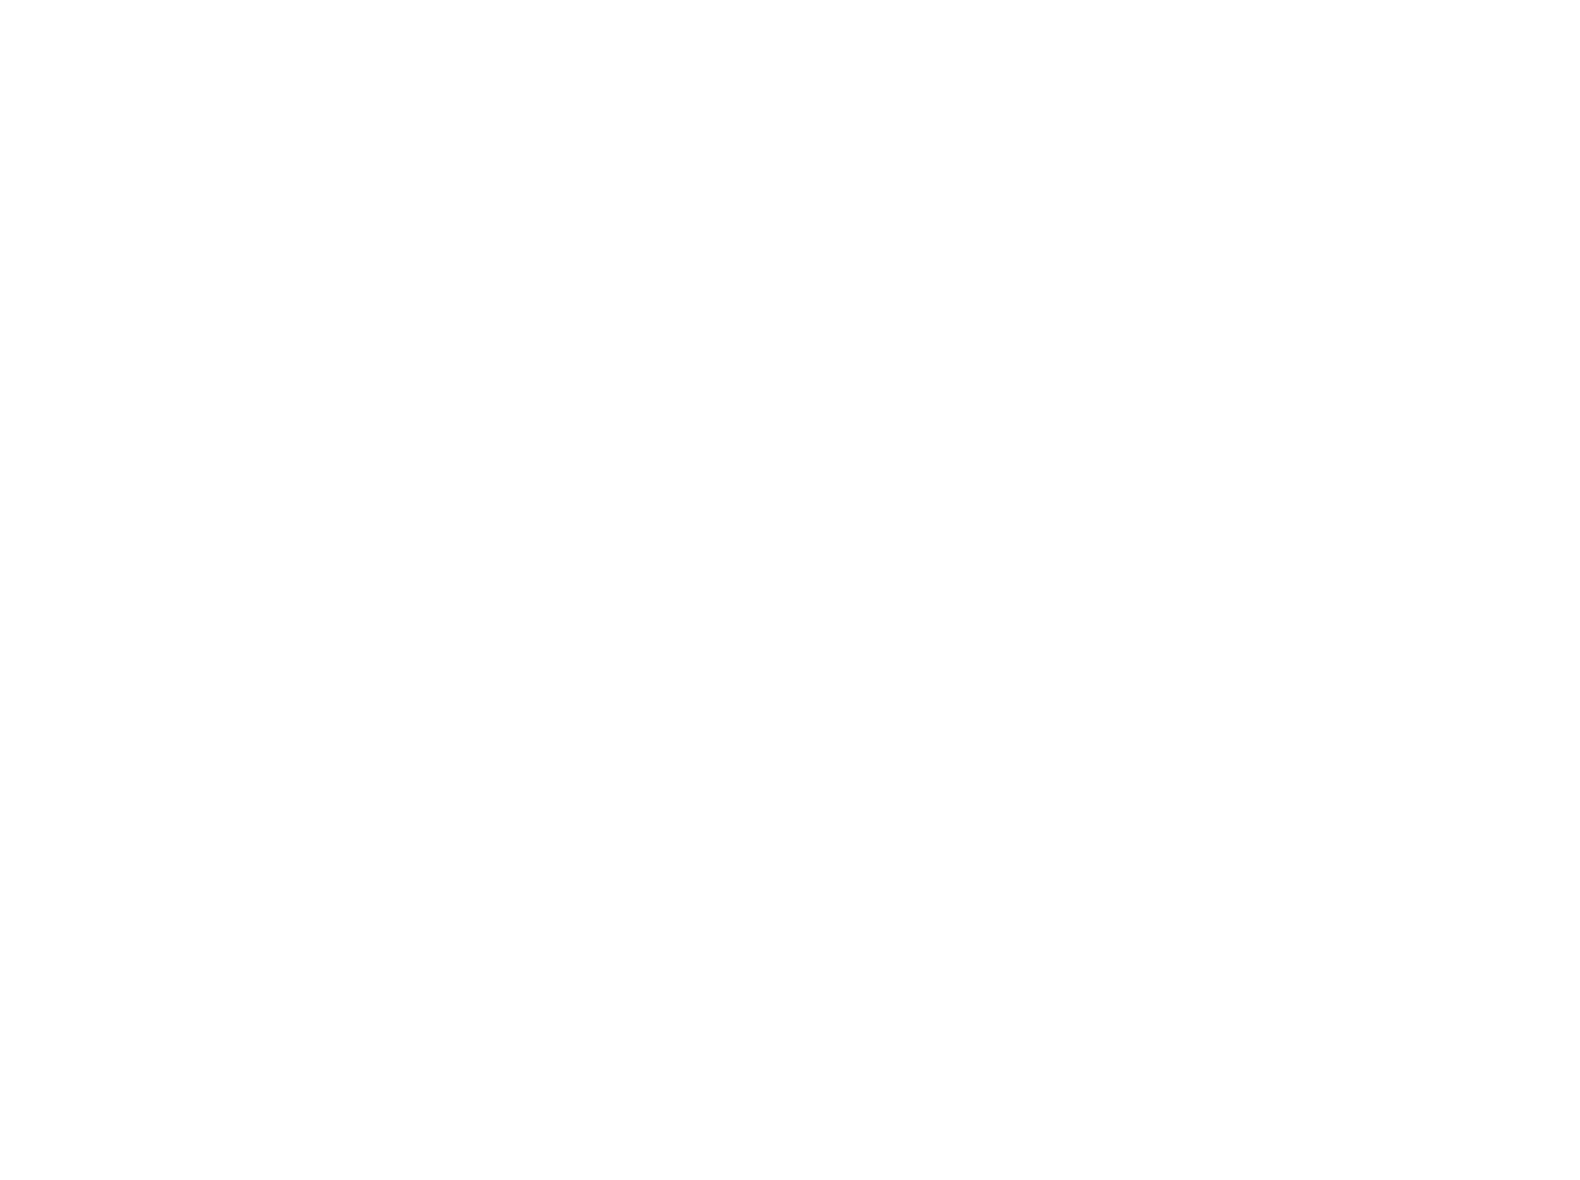

In [95]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, 
                   feature_names=df_x.columns.values,  
                   class_names=df_y.columns.values,
                   filled=True )

In [ ]:
!pip install graphviz

In [ ]:
!pip install pydotplus

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=df_x.columns.values 
                                class_names= df_y.columns.values,
                                #filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png" ) 


In [ ]:
import graphviz 
tree1_view = tree.export_graphviz(decision_tree, out_file=None, feature_names = df_x.columns.values, rotate=True) 
tree1viz = graphviz.Source(tree1_view)
tree1viz

## Gaussian Mixture

In [ ]:
# GMM 

gmm=mixture.GaussianMixture()
gmm.fit(X_train,y_train)
Y_pred=gmm.predict(X_test)
acc_gmm=round(gmm.score(X_train,y_train)*100,2)
print(acc_gmm)
X_train

In [96]:
import pickle

In [97]:
pickle.dump(knn , open("knn.pkl", "wb"))
pickle.dump(gaussian , open("gaussian.pkl", "wb"))


In [98]:
# model = pickle.load(open('knn.pkl','rb'))
# print(model.predict([[2,3,6.75,1]]))

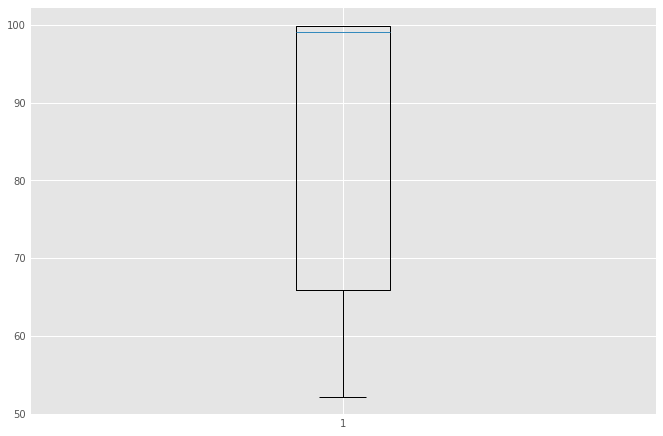

In [99]:
ig = plt.figure(figsize =(10, 7)) 
plt.boxplot([score_rf,score_log,score_lsvc,score_gaussian,score_knn])
plt.show()

## Hard Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

model_hard = VotingClassifier(estimators=[('rf',random_forest), ('LR', logreg),('GNB', gaussian),('DT', decision_tree),('KNN', knn)], voting='hard')


In [ ]:
model_hard

In [ ]:
model_hard.fit(X_train,y_train)
# model.score(X_test,y_test)

In [ ]:
ans_pred=model_hard.predict(X_test)

In [ ]:
score_ensemble = accuracy_score(y_test, ans_pred)*100
score_ensemble 

pickle.dump(model_hard , open("model_hard.pkl", "wb"))



model = pickle.load(open('model_hard.pkl','rb'))
q=model.predict([[5,6,7,6]])

## Soft Voting

In [ ]:
model_soft = VotingClassifier(estimators=[('rf',random_forest), ('LR', logreg),('GNB', gaussian),('DT', decision_tree),('KNN', knn)], voting='soft')

In [ ]:
model_soft.fit(X_train,y_train)
ans_soft=model_soft.predict(X_test)
score_ensemble_soft = ((accuracy_score(y_test, ans_soft)) *100)
score_ensemble_soft

In [ ]:
Y_pred_KNN

In [ ]:
if crop_dict.value

In [ ]:
print(crop_dict.values)

In [ ]:
for i in crop_dict:
    if crop_dict[i]==q:
        print(i)

In [ ]:
i.values()



In [ ]:
r=input('REGION:')
s=input('SOWING_TIME:')
a=input('Average Soil_pH:')
st=input('SOIL_TYPE:')

In [ ]:
st=input('SOIL_TYPE:')

In [ ]:
#Gujarat        June              6.5  black cotton soil
region_dict
sowing_dic
soil_dict
soilph_dict
black cotton soil

black cotton soil 
clayey loam soil
light black soil
calcareous alluvial soil
Lateritic and black cotton soils
Clay loa

In [ ]:

pre=[]
for i in region_dict:
    if i==r:
        print(region_dict[i])
        pre.append(region_dict[i])

In [ ]:
for i in sowing_dict:
    if i==s:
        print(sowing_dict[i])
        pre.append(sowing_dict[i])

In [ ]:
for i in soilph_dict:
    if str(i)==a:
        print(soilph_dict[i])
        pre.append(i) 
        
for i in soil_dict:
    if i=='black cotton soil\xa0':
        print(soil_dict[i])
        pre.append(soil_dict[i])
       


In [ ]:


pre

In [ ]:
type(i)
h=i.astype(np.float)
type(h)

In [ ]:
predicions

In [ ]:
pre

In [ ]:
pre=[]